**Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

### Histogram of Oriented Gradients (HOG)

#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

The code for this step is contained in the first code cell of the IPython notebook (or in lines # through # of the file called `some_file.py`).  

I started by reading in all the `vehicle` and `non-vehicle` images.  Here is an example of one of each of the `vehicle` and `non-vehicle` classes:

![alt text][image1]

I then explored different color spaces and different `skimage.hog()` parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`).  I grabbed random images from each of the two classes and displayed them to get a feel for what the `skimage.hog()` output looks like.

Here is an example using the `YCrCb` color space and HOG parameters of `orientations=8`, `pixels_per_cell=(8, 8)` and `cells_per_block=(2, 2)`:


![alt text][image2]

__Import libraries__

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import random

% matplotlib inline

__Import functions__

In [2]:
from helper_functions import data_look

__Initialization__

In [3]:
# Images are in PNG format and divided into vehichles and non-vehicles
vehicles_images = glob.glob('./training_dataset/vehicles/*/*.png')
non_vehicles_images = glob.glob('./training_dataset/non-vehicles/*/*.png')

vehicles = []
non_vehicles = []

__Reading all images__

In [4]:
for image in vehicles_images:
    vehicles.append(image)

for image in non_vehicles_images:
    non_vehicles.append(image)

# Shuffle image data
random.shuffle(vehicles)
random.shuffle(non_vehicles)

# Take the first 10 images for testing
vehicles = vehicles[:10]
non_vehicles = non_vehicles[:10]

# Store some characteristics of the dataset
data_info = data_look(vehicles, non_vehicles)

print('Your function returned a count of', 
      data_info["n_vehicles"], ' vehicles and', 
      data_info["n_non_vehicles"], ' non-vehicles')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

Your function returned a count of 10  vehicles and 10  non-vehicles
of size:  (64, 64, 3)  and data type: float32


__Plot one sample image from each classes__

Current random index is 5


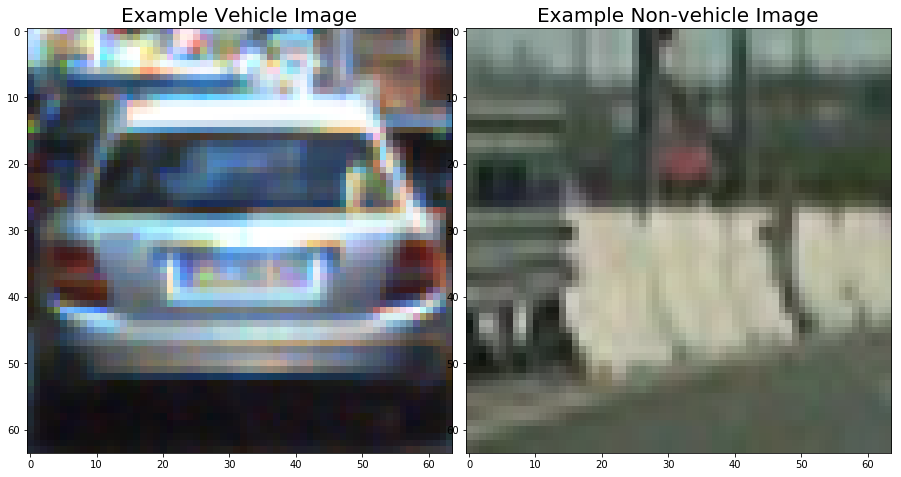

In [5]:
# Return a random index within range of the minimum length in both lists
idx_max = np.minimum(data_info["n_vehicles"], data_info["n_non_vehicles"])
idx_random = np.random.randint(0, idx_max)
print("Current random index is", idx_random)

# Read in vehicles / non-vehicles images
vehicle_image = mpimg.imread(vehicles[idx_random])
non_vehicle_image = mpimg.imread(non_vehicles[idx_random])

# Plot the examples
f, axs = plt.subplots(1, 2, figsize=(30, 15))
axs = axs.ravel()

axs[0].imshow(vehicle_image)
axs[0].set_title('Example Vehicle Image', fontsize = 20)

axs[1].imshow(non_vehicle_image)
axs[1].set_title('Example Non-vehicle Image', fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0., right=0.4, top=0.9, bottom=0.)

__Apply HOG with different parameters__

__Import functions__

In [6]:
from helper_functions import get_hog_features

__Define parameters__

In [15]:
# Define HOG parameters
orient = 9
pix_per_cell = 16
cell_per_block = 4
vis = True
feature_vec = False

__Covert to grayscale__

In [16]:
# Convert to grayscale
gray_vehicle = cv2.cvtColor(vehicle_image, cv2.COLOR_RGB2GRAY)
gray_non_vehicle = cv2.cvtColor(non_vehicle_image, cv2.COLOR_RGB2GRAY)

__Return HOG features and visualization__

In [17]:
# Return HOG features and visualization
features_vehicle, hog_image_vehicle = get_hog_features(gray_vehicle, orient,
                                                      pix_per_cell, cell_per_block,
                                                      vis, feature_vec)

features_non_vehicle, hog_image_non_vehicle = get_hog_features(gray_non_vehicle, orient,
                                                      pix_per_cell, cell_per_block,
                                                      vis, feature_vec)

__Plot images__

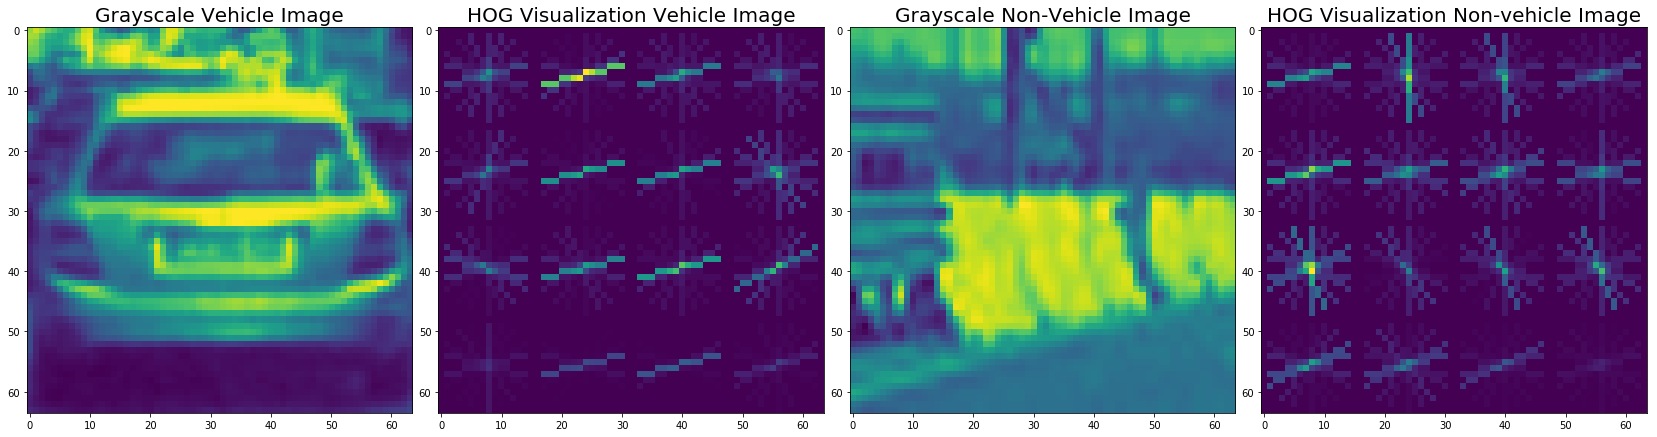

In [18]:
# Plot the examples
f, axs = plt.subplots(1, 4, figsize=(30, 30))
axs = axs.ravel()

axs[0].imshow(gray_vehicle)
axs[0].set_title('Grayscale Vehicle Image', fontsize = 20)

axs[1].imshow(hog_image_vehicle)
axs[1].set_title('HOG Visualization Vehicle Image', fontsize = 20)

axs[2].imshow(gray_non_vehicle)
axs[2].set_title('Grayscale Non-Vehicle Image', fontsize = 20)

axs[3].imshow(hog_image_non_vehicle)
axs[3].set_title('HOG Visualization Non-vehicle Image', fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.1)

__Apply spatial binning in different color spaces__

__Import libraries__

In [ ]:
from sklearn.preprocessing import StandardScaler

__Import functions__

In [ ]:
from helper_functions import extract_features_bin_spatial

__Define parameters__

In [ ]:
color_space_1 = 'RGB'
spatial_size=(32, 32)
hist_bins=32
hist_range=(0, 256)

__Return spatial binning of color features__

In [ ]:
features_bin_spatial_vehicle = extract_features_bin_spatial(vehicles, color_space_1, spatial_size,
                        hist_bins, hist_range)

features_bin_spatial_non_vehicle = extract_features_bin_spatial(non_vehicles, color_space_1, spatial_size,
                        hist_bins, hist_range)


__Plot images__

In [ ]:
# Plot image
if len(features_bin_spatial_vehicle) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((features_bin_spatial_vehicle, features_bin_spatial_non_vehicle)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(features_bin_spatial_vehicle))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(vehicles[idx_random]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[idx_random])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[idx_random])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

#### 2. Explain how you settled on your final choice of HOG parameters.

I tried various combinations of parameters and...

__Hyper parameters__

#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

I trained a linear SVM using...

### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?

I decided to search random window positions at random scales all over the image and came up with this (ok just kidding I didn't actually ;):

![alt text][image3]

__Define Parameters__

#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?

Ultimately I searched on two scales using YCrCb 3-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a nice result.  Here are some example images:

![alt text][image4]

__Plot some example images__

### Video Implementation

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)
Here's a [link to my video result](./project_video.mp4)

#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

I recorded the positions of positive detections in each frame of the video.  From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Here's an example result showing the heatmap from a series of frames of video, the result of `scipy.ndimage.measurements.label()` and the bounding boxes then overlaid on the last frame of video:

### Here are six frames and their corresponding heatmaps:

![alt text][image5]

### Here is the output of `scipy.ndimage.measurements.label()` on the integrated heatmap from all six frames:
![alt text][image6]

### Here the resulting bounding boxes are drawn onto the last frame in the series:
![alt text][image7]

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further. 